#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# missing values
df.JobSatisfaction.isnull().mean()

0.20149722542142184

In [3]:
df.JobSatisfaction[df.EmploymentStatus == 'Employed full-time'].mean()

6.980607926125433

In [4]:
job_sat = pd.DataFrame(data = {'EmploymentStatus': [], 'JobSatisfaction':[]})

In [47]:
def job_sat_feature(df,feature_col,print_bool = False):
    """ Given the data frame and a specific column, returns a new data
        frame containing the average job satisfaction for each unique value of that column
    """
    value_list = []
    sat_list = []
    for value in df[feature_col].unique():
        value_list.append(value)
        satisfaction = df.JobSatisfaction[df[feature_col] == value].mean() - df.JobSatisfaction.mean()
        sat_list.append(satisfaction)
    df_jobsat = pd.DataFrame(data = {feature_col: value_list, 'JobSatisfaction':sat_list}).sort_values(by='JobSatisfaction')
    
    if print_bool == True:
        df_jobsat.plot(kind='bar',x = feature_col, y = 'JobSatisfaction', legend= False, title='Job Satisfaction')
        plt.show()
    return df_jobsat



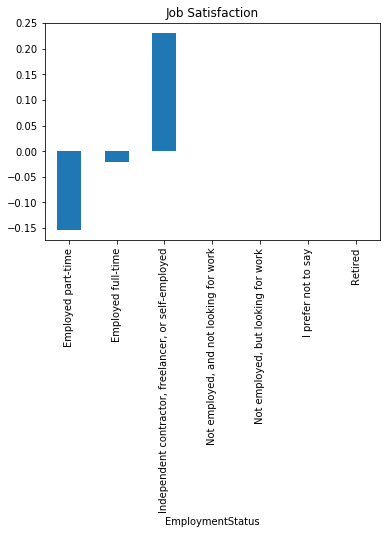

,EmploymentStatus,JobSatisfaction
1,Employed part-time,-0.154567
2,Employed full-time,-0.020113
3,"Independent contractor, freelancer, or self-em...",0.231264
0,"Not employed, and not looking for work",NaN
4,"Not employed, but looking for work",NaN
5,I prefer not to say,NaN
6,Retired,NaN


In [48]:
job_sat = job_sat_feature(df,'EmploymentStatus',True)

display(job_sat)

In [6]:
# Job Satisfaction
stat_list = []
sat_list = []
for status in df.EmploymentStatus.unique():
    stat_list.append(status)
    satisfaction = df.JobSatisfaction[df.EmploymentStatus == status].mean()
    sat_list.append(satisfaction)
    print('Status: {0} \nSatisfaction: {1}\n-------------'.format(status, satisfaction))
    
job_sat = pd.DataFrame(data = {'EmploymentStatus': stat_list, 'JobSatisfaction':sat_list})
display(job_sat)

Status: Not employed, and not looking for work 
Satisfaction: nan
-------------
Status: Employed part-time 
Satisfaction: 6.846153846153846
-------------
Status: Employed full-time 
Satisfaction: 6.980607926125433
-------------
Status: Independent contractor, freelancer, or self-employed 
Satisfaction: 7.231984829329962
-------------
Status: Not employed, but looking for work 
Satisfaction: nan
-------------
Status: I prefer not to say 
Satisfaction: nan
-------------
Status: Retired 
Satisfaction: nan
-------------


,EmploymentStatus,JobSatisfaction
0,"Not employed, and not looking for work",NaN
1,Employed part-time,6.846154
2,Employed full-time,6.980608
3,"Independent contractor, freelancer, or self-em...",7.231985
4,"Not employed, but looking for work",NaN
5,I prefer not to say,NaN
6,Retired,NaN


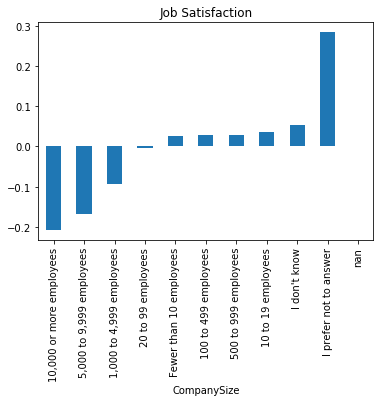

In [49]:
# CompanySize
company_sat = job_sat_feature(df,'CompanySize',True)


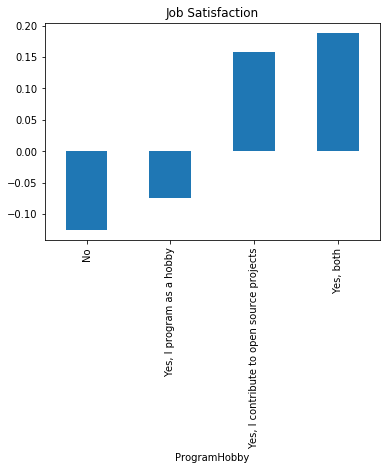

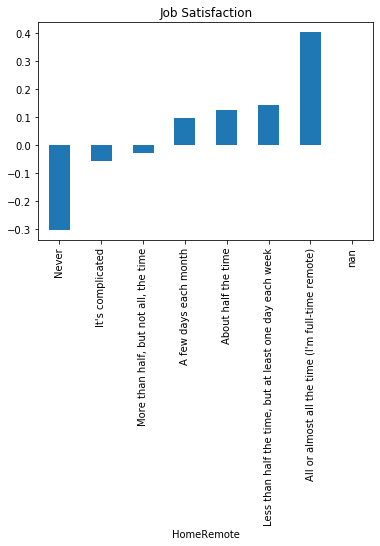

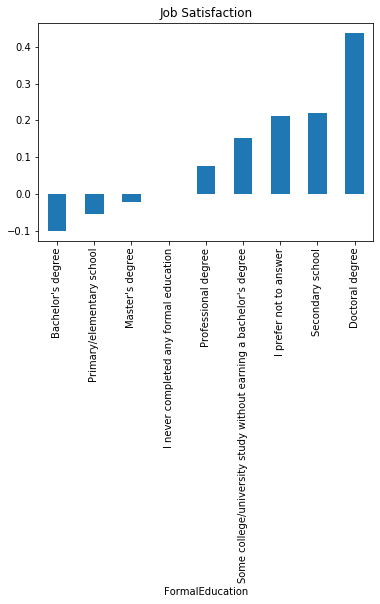

In [50]:
# Hobby
company_sat = job_sat_feature(df,'ProgramHobby',True)

# HomeRemote
company_sat = job_sat_feature(df,'HomeRemote',True)

# PhD
company_sat = job_sat_feature(df,'FormalEducation',True)



#### Question 1

**1.** Use the space above to assist in matching each variable (**a**, **b**, **c**, **d**, **e**, **f**, **g**, or **h** ) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [26]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


#### Question 2

**2.** Use the space above to assist in matching each variable (**a**, **b**, **c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [46]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!


In [55]:
df.groupby('CompanySize').mean()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
CompanySize,,,,,,,
"1,000 to 4,999 employees",9337.514170,7.405000,6.908506,2.729167,8.343363,64870.410792,31044.830927
10 to 19 employees,9688.816062,7.386125,7.035739,3.852512,8.458015,47107.687694,34708.875564
"10,000 or more employees",9048.205706,7.376396,6.793617,3.063604,8.353940,75018.799267,36101.308322
100 to 499 employees,9368.932120,7.488691,7.029324,3.196777,8.404384,60132.019080,40322.927562
20 to 99 employees,9614.431549,7.385728,6.997039,3.245587,8.393952,52223.725309,32718.399806
"5,000 to 9,999 employees",9060.367987,7.382716,6.832155,3.494024,8.286938,64610.820185,46739.165852
500 to 999 employees,9638.247357,7.473976,7.029967,3.488312,8.390173,63475.130410,32409.073400
Fewer than 10 employees,9820.607143,7.276900,7.025719,3.712707,8.475327,44703.438821,27962.243000
I don't know,9816.160772,7.424370,7.054622,3.500000,8.163366,53390.534078,52742.495612
